In [2]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('MLF_GP2_EconCycle.csv')
df = df.iloc[:, 1:]

#df = df.drop(df.index[0])
df.head()

,T1Y Index,T2Y Index,T3Y Index,T5Y Index,T7Y Index,T10Y Index,CP1M,CP3M,CP6M,CP1M_T1Y,CP3M_T1Y,CP6M_T1Y,USPHCI,PCT 3MO FWD,PCT 6MO FWD,PCT 9MO FWD
0,10.41,9.86,9.50,9.20,9.14,9.10,9.75,9.95,10.01,0.936599,0.955812,0.961575,47.08,0.011470,0.018060,0.024406
1,10.24,9.72,9.29,9.13,9.11,9.10,9.74,9.90,9.96,0.951172,0.966797,0.972656,47.32,0.009298,0.014866,0.020612
2,10.25,9.79,9.38,9.20,9.15,9.12,9.72,9.85,9.87,0.948293,0.960976,0.962927,47.39,0.010340,0.015455,0.020154
3,10.12,9.78,9.43,9.25,9.21,9.18,9.86,9.95,9.98,0.974308,0.983202,0.986166,47.62,0.006720,0.013141,0.017409
4,10.12,9.78,9.42,9.24,9.23,9.25,9.77,9.76,9.71,0.965415,0.964427,0.959486,47.76,0.005653,0.011451,0.016353


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223 entries, 0 to 222
Data columns (total 16 columns):
T1Y Index      223 non-null float64
T2Y Index      223 non-null float64
T3Y Index      223 non-null float64
T5Y Index      223 non-null float64
T7Y Index      223 non-null float64
T10Y Index     223 non-null float64
CP1M           223 non-null float64
CP3M           223 non-null float64
CP6M           223 non-null float64
CP1M_T1Y       223 non-null float64
CP3M_T1Y       223 non-null float64
CP6M_T1Y       223 non-null float64
USPHCI         223 non-null float64
PCT 3MO FWD    223 non-null float64
PCT 6MO FWD    223 non-null float64
PCT 9MO FWD    223 non-null float64
dtypes: float64(16)
memory usage: 28.0 KB


# 1. EDA

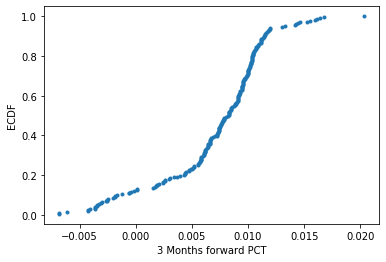

In [4]:
#ECDF plot
x = np.sort(df["PCT 3MO FWD"])
y = np.arange(1, len(x)+1) / len(x) 
plt.plot(x, y, marker='.', linestyle='none')
plt.xlabel("3 Months forward PCT")
plt.ylabel("ECDF")
plt.show()

In [5]:
correlation = pd.DataFrame(df.corr())
correlation

,T1Y Index,T2Y Index,T3Y Index,T5Y Index,T7Y Index,T10Y Index,CP1M,CP3M,CP6M,CP1M_T1Y,CP3M_T1Y,CP6M_T1Y,USPHCI,PCT 3MO FWD,PCT 6MO FWD,PCT 9MO FWD
T1Y Index,1.000000,0.992299,0.981237,0.961512,0.946299,0.934787,0.962917,0.967800,0.973094,0.213583,0.158550,0.006001,-0.771879,-0.407624,-0.460467,-0.488882
T2Y Index,0.992299,1.000000,0.997306,0.986983,0.977260,0.968840,0.938417,0.945139,0.954145,0.147634,0.094849,-0.046372,-0.786831,-0.382981,-0.428199,-0.448940
T3Y Index,0.981237,0.997306,1.000000,0.995546,0.989145,0.982837,0.919866,0.927224,0.937839,0.113604,0.062140,-0.072444,-0.790018,-0.368031,-0.409257,-0.427909
T5Y Index,0.961512,0.986983,0.995546,1.000000,0.998315,0.995331,0.890890,0.899064,0.911446,0.066948,0.017599,-0.108187,-0.802284,-0.351309,-0.386366,-0.400488
T7Y Index,0.946299,0.977260,0.989145,0.998315,1.000000,0.999073,0.872348,0.880997,0.894304,0.049383,0.001674,-0.119328,-0.811539,-0.336880,-0.368737,-0.380166
T10Y Index,0.934787,0.968840,0.982837,0.995331,0.999073,1.000000,0.859418,0.868233,0.881913,0.038051,-0.008190,-0.125453,-0.818440,-0.327772,-0.357288,-0.367086
CP1M,0.962917,0.938417,0.919866,0.890890,0.872348,0.859418,1.000000,0.998414,0.993353,0.453449,0.398043,0.233306,-0.734319,-0.404970,-0.481658,-0.525706
CP3M,0.967800,0.945139,0.927224,0.899064,0.880997,0.868233,0.998414,1.000000,0.997961,0.431575,0.388461,0.235302,-0.741016,-0.402216,-0.478063,-0.520682
CP6M,0.973094,0.954145,0.937839,0.911446,0.894304,0.881913,0.993353,0.997961,1.000000,0.398250,0.363720,0.224784,-0.750358,-0.395837,-0.469990,-0.511409
CP1M_T1Y,0.213583,0.147634,0.113604,0.066948,0.049383,0.038051,0.453449,0.431575,0.398250,1.000000,0.960934,0.842627,-0.137622,-0.151815,-0.245750,-0.309385


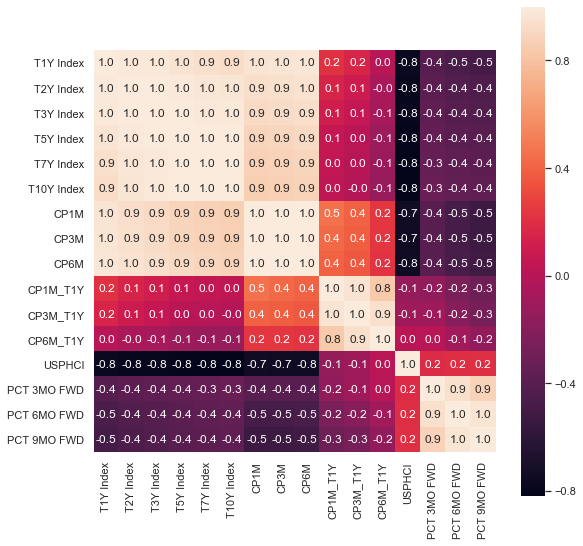

In [6]:
sns.set(style='whitegrid', context='notebook')
#chang the figure size bigger
plt.figure(figsize=(9,9))
hm = sns.heatmap(correlation,
                 linewidths=0,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.1f',
                 annot_kws={'size': 12},
                 yticklabels=df.columns,
                 xticklabels=df.columns)
#annot, means whether to display the number int the middle blocks
#fmt, adjust the accruatacy of the number  0.1f mean to 0.1, 
# annot_kws, adjust the size of number in the middle blocks
plt.show()


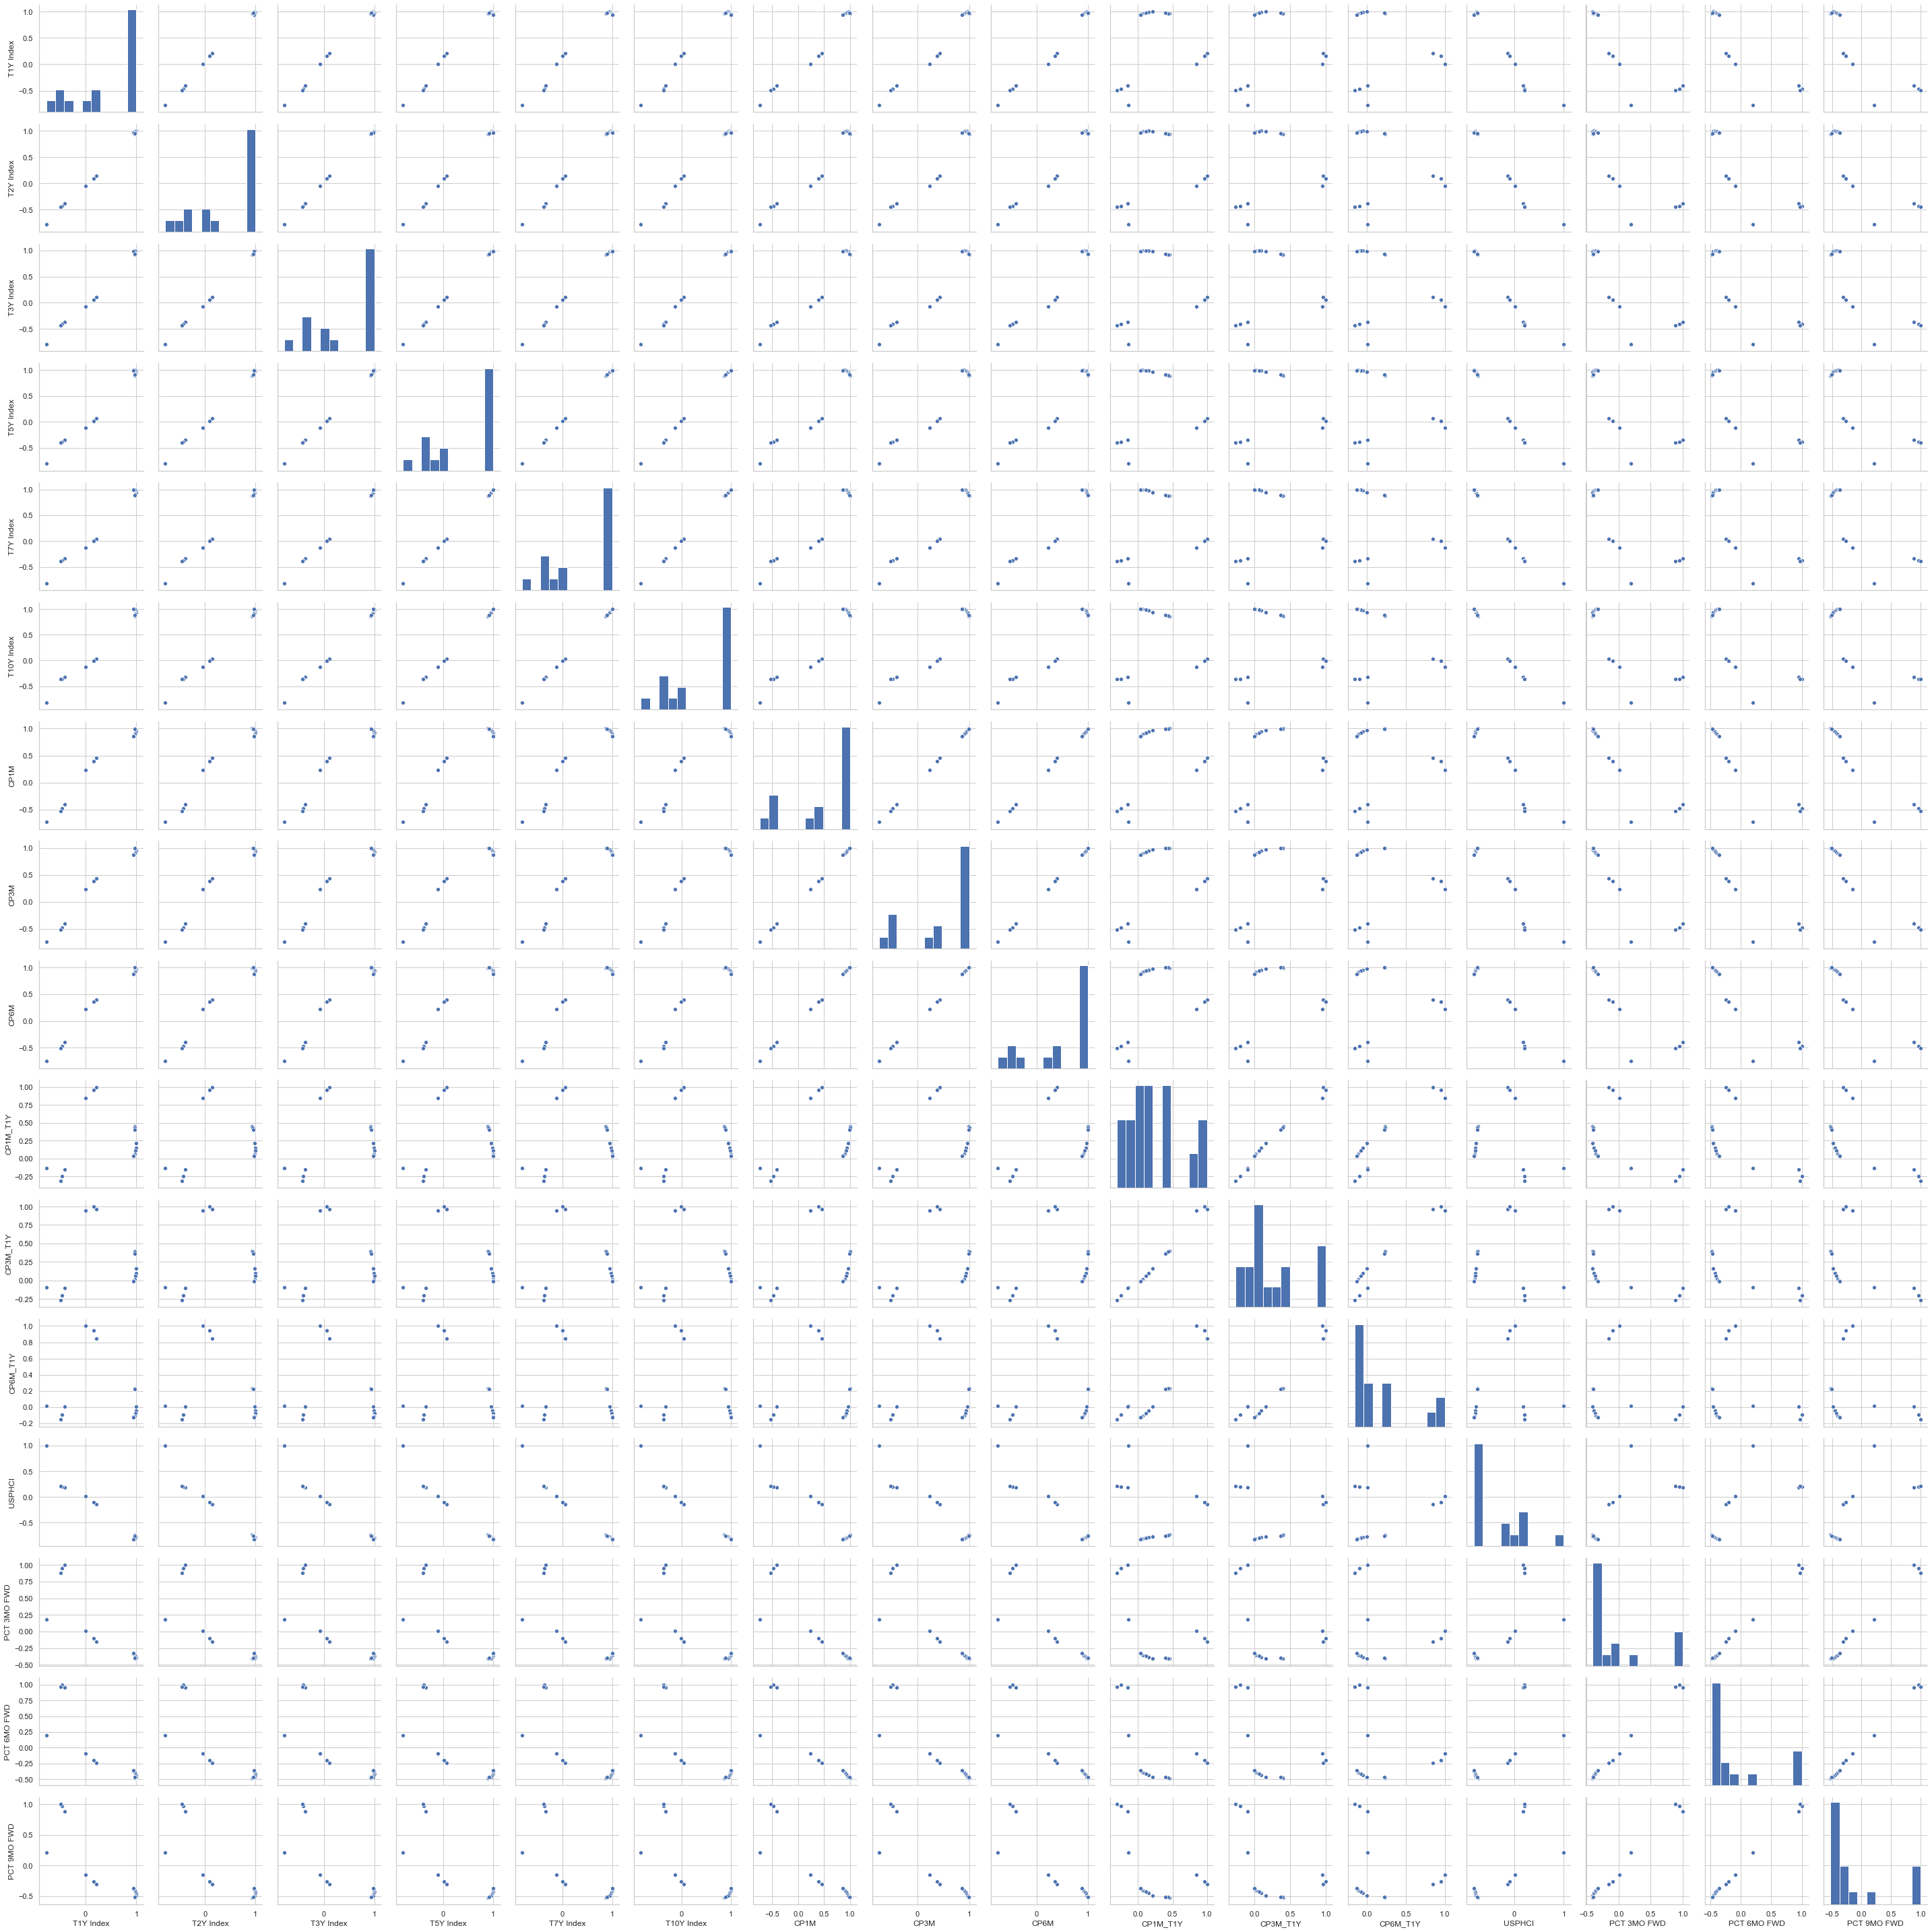

In [7]:
sns.pairplot(df.corr(), height=2.5)
#tight_layout is used to adjust spacing between subplots to minimize the overlaps.
plt.tight_layout()
plt.show()

# 2.  Preprocessing, feature extraction, feature selection

In [7]:
# observe the heatmap, we can found out that 'CP1M_T1Y', 'CP1M_T2Y', 'CP1M_T3Y', and 'USPHCI' has correlations near 0.
# So we drop these features, select the rest features.
X = df[df.columns[:-3]]
X.shape

(223, 13)

In [8]:
X = df.iloc[:, :12]
y3 = df.iloc[:, 13]
y6 = df.iloc[:, 14]
y9 = df.iloc[:, 15]
X.shape

(223, 12)

In [14]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, cross_val_predict, cross_validate
from sklearn.tree import DecisionTreeRegressor

# Split the dataset into a training and a testing set
# Test set will be 20% taken randomly
#X_train, X_test, y3_train, y3_test = train_test_split(X, y3, test_size=0.2, random_state=42)

from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

mmns = MinMaxScaler()
scaler = preprocessing.StandardScaler().fit(X)
X_std = scaler.transform(X)
#X_test_std = scaler.transform(X_test)
#X_std = X.apply(lambda x : (x-np.mean(x))/(np.std(x)))
pca = PCA(n_components = 2)
X_pca = pca.fit_transform(X_std)
features=range(pca.n_components_)

#X_train2 = X_train.iloc[:, 6:12]
#print(X_train2)
#X_train2_std = scaler.transform(X_train2)
#pca2 = PCA(n_components = 3)
#X_train2_pca = pca.fit_transform(X_train2_std)
#print(X_train2_pca.shape)
#print(type(X_train))


# Standardize the features
#scaler = preprocessing.StandardScaler().fit(X_train)
#X_train = scaler.transform(X_train)
#X_test = scaler.transform(X_test)

#print('Shape of X_train: ', X_train.shape)
#print('Shape of y3_train: ', y3_train.shape)
#print('Shape of X_test: ', X_test.shape)
#print('Shape of y3_test: ', y3_test.shape)

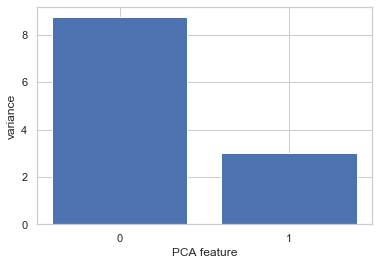

In [15]:
plt.bar(features, pca.explained_variance_)
plt.xticks(features)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.show()

In [16]:
#split into train dataset and test dataset
X_train, X_test, y3_train, y3_test = train_test_split(X_pca, y3, test_size=0.2, random_state=42)


In [17]:
#linear regression
lr = LinearRegression()
First_model = lr.fit(X_train,y3_train)
print('coefficient: ', First_model.coef_)
print('intercept: ', First_model.intercept_)
print('training set R2: ', First_model.score(X_train, y3_train))
print('training set MSE: ', mean_squared_error(First_model.predict(X_train), y3_train))
print('testing set R2_linear: ', First_model.score(X_test, y3_test))
print('testing set MSE: ', mean_squared_error(First_model.predict(X_test), y3_test))


#ridge regression
ridge = Ridge()
parameters = {'alpha': [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10, 15, 20]}
Second_model = GridSearchCV(ridge,parameters, cv = 10)
Second_model.fit(X_train,y3_train)
y3_pred = Second_model.predict(X_test)
r2_ridge = Second_model.score(X_test, y3_test)
MSE = mean_squared_error(y3_pred, y3_test)

print(r2_ridge)
print(MSE)
print(Second_model.best_params_)
#print(ridge_regressor.best_score_)

coefficient:  [-6.73288670e-04 -1.53279746e-05]
intercept:  0.007073428996211087
training set R2:  0.17199108979130961
training set MSE:  1.9963614865377114e-05
testing set R2_linear:  0.03183087843607746
testing set MSE:  1.9410306213263942e-05
0.03336455263306193
1.9379558397482786e-05
{'alpha': 20}


/Users/jieqian/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [129]:
#random forest regression - Third_model using random forest 
rmse_test = []
ran = []
test_acc = []
for n in range(10,100,10):
    rf = RandomForestRegressor(n_estimators=n,
            random_state=2)
    rf.fit(X_train,y3_train)
    r2_rf = rf.score(X_test,y3_test)
    MSE1 = mean_squared_error(y3_pred_new,y3_test)
print(r2_rf)
print(MSE1)

0.03692173418140132
1.9308242362327783e-05


In [130]:
# decision tree with cross validation 
Fourth_model = DecisionTreeRegressor()
param = {'max_depth':[3, 6, 9, 12, 15, 18, 21, 24]}
dt = GridSearchCV(Fourth_model, param, cv=10)
dt.fit(X_train, y3_train)

y3_pred_new1 = dt.predict(X_test)
r2_dt = dt.score(X_test, y3_pred_new1)
mse = mean_squared_error(y3_pred_new1, y3_test)

print(r2_dt)
print(mse)
print(dt.best_params_)

1.0
1.859837074145979e-05
{'max_depth': 3}


//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [131]:
from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import cross_val_score, cross_val_predict, cross_validate

rmse_test = []
ran = []
test_acc = []
for n in range(10,100,10):
    rf = RandomForestRegressor(n_estimators=n,
            random_state=2)
    rf.fit(X_train,y3_train)
    y_pred = rf.predict(X_test)
    test_acc.append(np.mean(cross_val_score(rf, X_test, y3_test, cv=10, n_jobs=-1)))
    rmse_test.append((MSE(y3_test, y_pred))**0.5)
    ran.append(n)

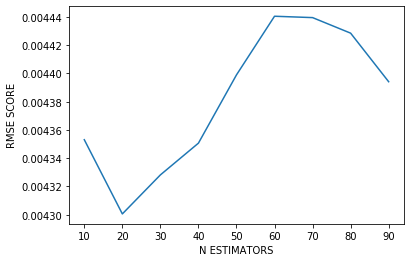

In [132]:
import matplotlib.pyplot as plt

plt.plot(ran, rmse_test)
plt.xlabel('N ESTIMATORS')
plt.ylabel('RMSE SCORE')
plt.show()

In [133]:
#use the best n_estimators= 20
rf = RandomForestRegressor(n_estimators=20,
            random_state=2)
rf.fit(X_train,y3_train)
r2_newest = rf.score(X_test,y3_test)
MSE_newest = mean_squared_error(y3_pred_new,y3_test)
print(r2_newest)
print(MSE_newest)

0.07748811599626271
1.9308242362327783e-05
